<a href="https://colab.research.google.com/github/atrahay/news_nao/blob/main/News_nao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import requests
import math
import pandas as pd

df = pd.DataFrame(columns=['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])
df
API_KEY = "258275c0180041fb82b5f9d574799473"
url = f"https://newsapi.org/v2/everything?q=karate&apiKey={API_KEY}"
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    nb_pages = math.ceil(data["totalResults"] / 100) # pagination
else:
    print('Error:', response.status_code)
for counter in range(1, nb_pages + 1):
  url = f"https://newsapi.org/v2/everything?q=karate&page={counter}&apiKey={API_KEY}"
  response = requests.get(url)
  if response.status_code == 200:
      data = response.json()
  else:
      print('Error:', response.status_code)
  for count in range(100):
    if count < len(data["articles"]):
      my_dict = data["articles"][count]
      my_list = [my_dict['source']['name'], my_dict['author'], my_dict['title'], my_dict['description'], my_dict['url'], my_dict['urlToImage'], my_dict['publishedAt'], my_dict['content']]
      df.loc[count + (counter - 1) * 100]= my_list
      


In [39]:
from datetime import date, timedelta
today = date.today() # today
day = timedelta(days=1) # 1 day duration

for counter in range(30):
  temp_date = today - counter*day
  date = f"{temp_date.year}-{temp_date.month}-{temp_date.day}"
  nwe_date = f"https://newsapi.org/v2/everything?q=karate&from={date}&sortBy=publishedAt&apiKey={API_KEY}"
  print(f"https://newsapi.org/v2/everything?q=karate&from={date}&sortBy=publishedAt&apiKey={API_KEY}")

nwe_date

https://newsapi.org/v2/everything?q=karate&from=2023-3-22&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473
https://newsapi.org/v2/everything?q=karate&from=2023-3-21&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473
https://newsapi.org/v2/everything?q=karate&from=2023-3-20&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473
https://newsapi.org/v2/everything?q=karate&from=2023-3-19&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473
https://newsapi.org/v2/everything?q=karate&from=2023-3-18&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473
https://newsapi.org/v2/everything?q=karate&from=2023-3-17&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473
https://newsapi.org/v2/everything?q=karate&from=2023-3-16&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473
https://newsapi.org/v2/everything?q=karate&from=2023-3-15&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473
https://newsapi.org/v2/everything?q=karate&from=2023-3-14&sortBy

'https://newsapi.org/v2/everything?q=karate&from=2023-2-21&sortBy=publishedAt&apiKey=258275c0180041fb82b5f9d574799473'

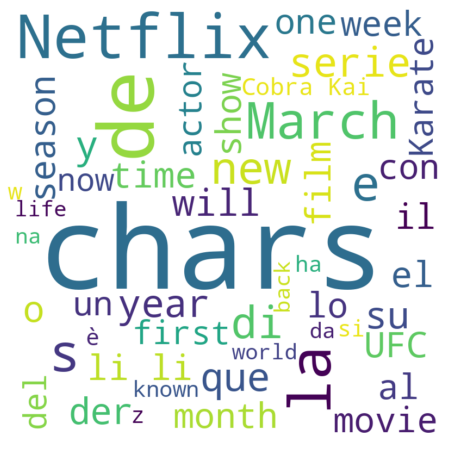

In [40]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

text = " ".join(df['content'])

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50, stopwords=None, min_font_size=10).generate(text)
                                                                                                  
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

publishedAt = (df['publishedAt'])

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the preprocessed text data
vectorizer.fit_transform(publishedAt)

# Get the list of unique words in the text data
words = vectorizer.get_feature_names_out()

# Calculate the frequency of each word in the text data
word_freq = vectorizer.transform(publishedAt).toarray().sum(axis=0)

fig, ax = plt.subplots(figsize=(10,6))
ax.barh(words[np.argsort(word_freq)[-20:]], np.sort(word_freq)[-20:])
ax.set_xlabel('date')
ax.set_ylabel('link')
ax.invert_yaxis()
plt.show()
     

In [ ]:
je suis un caca
